# 12. 고윳값 분해: 선형대수학의 진주

In [1]:
import numpy as np
import pandas as pd
import sympy as sym
import scipy

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("ticks")
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg') # display figures in vector format
plt.rcParams.update({'font.size':14}) # set global font size

import statsmodels.api as sm


# 폰트 설정
%config InlineBackend.figure_format = 'retina'
plt.rcParams["axes.unicode_minus"] = False
plt.rc('font', family='NanumBarunGothic')

## 12-1. $A^{-1}$의 고유벡터는 $A$의 고유벡터와 같고 고윳값은 $A^{-1}$이다.
- $A$와 $A^{-1}$의 고윳값 분해를 풀어 이것이 사실임을 증명해라
- 무작위 최대계수 $5X5$ 대칭행렬을 사용해서 설명해라

In [2]:
# 무작위 5*5 행렬 생성
A = np.random.randn(5, 5)

# 대칭 행렬 만들기: A @ A^T
A = A @ A.T
A_inv = np.linalg.inv(A)

In [3]:
# 고유값, 고유벡터 구하기
evals_A, evecs_A = np.linalg.eig(A)
print(evals_A)
print("="*50)
print(evecs_A)

[5.51709294 6.7336562  2.15388056 0.20234076 0.6996439 ]
[[ 0.81756368 -0.06120352 -0.35363356 -0.25531759  0.37094473]
 [ 0.45966074  0.10379564  0.57132606  0.67186388  0.01113231]
 [ 0.11570101 -0.76516767 -0.306073    0.30697548 -0.46175436]
 [ 0.32101791  0.3807914   0.06287148 -0.31859585 -0.80404557]
 [-0.06214835  0.50497222 -0.67148814  0.53635305 -0.05069236]]


In [4]:
# A^-1의 고유값, 고유벡터 구하기
evals_A_inv, evecs_A_inv = np.linalg.eig(A_inv)
print(evals_A_inv)
print("="*50)
print(evecs_A_inv)

[4.94215805 1.42929853 0.4642783  0.18125488 0.14850773]
[[ 0.25531759 -0.37094473  0.35363356 -0.81756368 -0.06120352]
 [-0.67186388 -0.01113231 -0.57132606 -0.45966074  0.10379564]
 [-0.30697548  0.46175436  0.306073   -0.11570101 -0.76516767]
 [ 0.31859585  0.80404557 -0.06287148 -0.32101791  0.3807914 ]
 [-0.53635305  0.05069236  0.67148814  0.06214835  0.50497222]]


In [5]:
# Av = lambda * v
# AA^{-1} = 1
# A^-1의 고유값은 A의 고유값의 역수이다
print("A의 고유값          :", np.sort(evals_A))
print("A_inv의 고유값의 역수:", np.sort(1/evals_A_inv))

A의 고유값          : [0.20234076 0.6996439  2.15388056 5.51709294 6.7336562 ]
A_inv의 고유값의 역수: [0.20234076 0.6996439  2.15388056 5.51709294 6.7336562 ]


## 12-2. 그림 12-1의 왼쪽 그림 다시 생성하되 $V$의 열 대신 행을 사용한다

In [6]:
# 2*2 행렬 생성
matrix = np.array([[1,1],
                   [-1,5]])
random_matrix = np.random.randn(2, 2)

# eigenvalue, eigenvector 구하기
L, V = np.linalg.eig(matrix)
matrix_V = matrix @ V

(-1.5, 1.5)

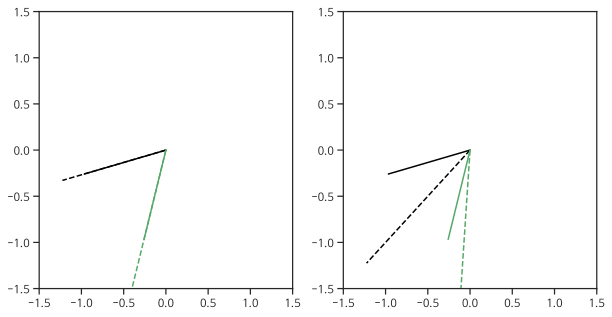

In [7]:
# V의 열 사용
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot([0, V[0,0]], [0,V[1,0]], color='black')
plt.plot([0, matrix_V[0,0]], [0,matrix_V[1,0]], color='black', linestyle='--')
plt.plot([0, V[0,1]], [0, V[1,1]], color='g')
plt.plot([0, matrix_V[0,1]], [0,matrix_V[1,1]], color='g', linestyle='--')
plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)



# V의 행 사용
plt.subplot(1,2,2)
plt.plot([0, V[0,0]], [0,V[0,1]], color='black')
plt.plot([0, matrix_V[0,0]], [0,matrix_V[0,1]], color='black', linestyle='--')
plt.plot([0, V[1,0]], [0, V[1,1]], color='g')
plt.plot([0, matrix_V[1,0]], [0,matrix_V[1,1]], color='g', linestyle='--')
plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)

## 12-10. 일반화된 고윳값 분해에서는 두 행렬이 대칭인 경우에도 고유 벡터 직교하지 않는다.
- 파이썬에서 $V^{-1} \neq V^{T}$ 확인, 이는 $A, B$ 모두 대칭이지만 $C=AB$가 대칭이 아니라서 그렇다
- 그러나 고유벡터는 $B$에 대해 직교하므로 $V^{T}BV = I$가 된다
- 두 대칭행렬에 대해 일반화된 고윳값 분해 수행하여 그림 그리고 특성을 확인하자

In [8]:
# 상관된 행렬 생성
A = np.random.randn(5, 5)
A = A @ A.T

B = np.random.randn(5, 5)
B = B @ B.T

L, V = scipy.linalg.eigh(A, B)

In [9]:
# V.T 확인
print(V.T)

[[ 0.38191657  0.07200474 -0.01096367 -0.09432568  0.04587175]
 [-0.22344589  0.06530466 -0.41929757 -0.20721702  0.00688771]
 [-0.13934514  0.54270996 -0.12966601  0.04060064 -0.44426152]
 [ 1.20621386 -0.09192291  0.26472936  1.02869716  0.09105076]
 [-2.01273654  0.91704843  0.86230401  0.57059794  1.57716454]]


In [10]:
# inv(V) 확인
print(np.linalg.inv(V))

[[ 1.61765793  1.86123254  0.42507715 -1.96930776  1.46225457]
 [-0.06189003  0.14969972 -2.64519844  0.67497476  1.03602114]
 [-0.05458447  1.13336349  0.08314618  0.21942658 -0.85350321]
 [ 0.17819981  0.00970656 -0.52654578  0.88267873  0.19031354]
 [-0.07244236  0.26390202  0.05300739  0.06518076  0.33559034]]


In [11]:
# VtBV = I인지 확인
VtBV = V.T @ B @ V
np.allclose(VtBV, np.eye(5))

True

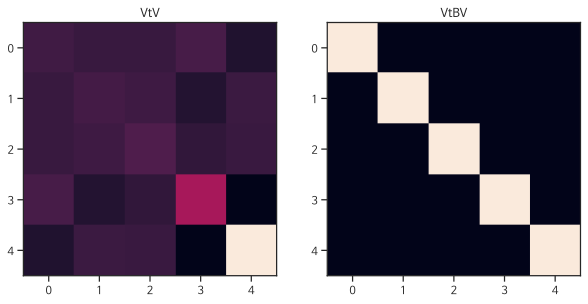

In [12]:
VtV = V.T @ V


transposed_dict = {"VtV": VtV, "VtBV": VtBV}

figs, axes = plt.subplots(1, 2, figsize=(10, 5))
axes = axes.flatten()

for i, key in enumerate(transposed_dict.keys()):
    # print(i, transposed)
    axes[i].imshow(transposed_dict[key])
    axes[i].set_title(f"{key}")

In [39]:
A = np.random.randn(5,5)
A = A.T@A
np.linalg.matrix_rank(A)

5

In [40]:
# A 고윳값 분해
L,V = np.linalg.eig(A)
# inv(A) 고윳값 분해
Linv, Vinv = np.linalg.eig(np.linalg.inv(A))

print('eigen value of A:')
print(np.sort(L))
print('')
print('eigen value of inv(A)')
print(np.sort(Linv))
print('')
print('* compare eigen value of A and inv(A)')
print('1 / eigen value of A:')
print(np.sort(1/L))
print('eigen value of inv(A):')
# print(np.sort(Linv))
print(np.sort(Linv))
print('')
print('eigen vector of A')
print(np.sort(V))
print('')
print('eigen vector of inv(A)')
print(np.sort(Vinv))
# np.sort를 왜 해야하지..?

eigen value of A:
[ 0.609121    1.36865596  3.14368183 10.34184751 11.52448202]

eigen value of inv(A)
[0.0867718  0.09669452 0.31809835 0.73064381 1.64170994]

* compare eigen value of A and inv(A)
1 / eigen value of A:
[0.0867718  0.09669452 0.31809835 0.73064381 1.64170994]
eigen value of inv(A):
[0.0867718  0.09669452 0.31809835 0.73064381 1.64170994]

eigen vector of A
[[ 0.0317879   0.22555236  0.46721099  0.52913955  0.67070179]
 [-0.83655896  0.14150474  0.15547405  0.20369681  0.46312088]
 [-0.39140439 -0.3325953  -0.08692263  0.44671832  0.7273721 ]
 [-0.68627344 -0.33990062  0.14134677  0.2266061   0.58495051]
 [-0.46373034  0.10082601  0.23312774  0.57100165  0.62801024]]

eigen vector of inv(A)
[[-0.46721099  0.0317879   0.22555236  0.52913955  0.67070179]
 [ 0.14150474  0.15547405  0.20369681  0.46312088  0.83655896]
 [-0.39140439 -0.3325953   0.08692263  0.44671832  0.7273721 ]
 [-0.68627344 -0.33990062 -0.14134677  0.2266061   0.58495051]
 [-0.46373034 -0.23312774  0.10

In [41]:
# Av = λv 확인
for i in range(len(L)):
    eigenvalue = L[i]
    eigenvector = V[:, i]
    
    Av = np.dot(A, eigenvector)        # A @ v 계산
    Lv = eigenvalue * eigenvector     # λ * v 계산
    
    print(f"Eigenvalue {i+1}: {eigenvalue}")
    print(f"A @ v: {Av}")
    print(f"λ * v: {Lv}")
    print(f"Difference: {np.abs(Av - Lv)}")  # 두 값의 차이 확인
    print()

Eigenvalue 1: 3.1436818345422908
A @ v: [ 1.46876271 -2.62987521 -0.27325709  0.44434926  0.73287943]
λ * v: [ 1.46876271 -2.62987521 -0.27325709  0.44434926  0.73287943]
Difference: [2.22044605e-15 3.10862447e-15 2.10942375e-15 1.72084569e-15
 1.11022302e-16]

Eigenvalue 2: 0.6091210003898417
A @ v: [ 0.40853854  0.08619351  0.27210551 -0.20704061 -0.28246789]
λ * v: [ 0.40853854  0.08619351  0.27210551 -0.20704061 -0.28246789]
Difference: [1.22124533e-15 3.34454686e-15 1.33226763e-15 2.08166817e-15
 9.99200722e-16]

Eigenvalue 3: 1.3686559618782808
A @ v: [ 0.30870358  0.27879085 -0.45520854 -0.93927223  0.78150481]
λ * v: [ 0.30870358  0.27879085 -0.45520854 -0.93927223  0.78150481]
Difference: [5.55111512e-17 1.11022302e-15 3.88578059e-16 8.88178420e-16
 1.55431223e-15]

Eigenvalue 4: 11.524482024291148
A @ v: [ 6.09805927  5.3372282  -4.51073291  6.74125167  1.16196758]
λ * v: [ 6.09805927  5.3372282  -4.51073291  6.74125167  1.16196758]
Difference: [3.55271368e-15 8.88178420e-16 

In [42]:
print("Eigenvalues of A:", L)
print("Eigenvalues of inv(A):", Linv)
print("1 / Eigenvalues of A:", 1 / L)  # 역수로 계산한 고유값 비교

# A^-1v = μv 관계 확인
for i in range(len(Linv)):
    eigenvalue_inv = Linv[i]         # A^-1의 고유값
    eigenvector_inv = Vinv[:, i]     # A^-1의 고유벡터
    
    A_inv_v = np.dot(np.linalg.inv(A), eigenvector_inv)  # A^-1 @ v
    mu_v = eigenvalue_inv * eigenvector_inv              # μ * v

    print(f"\nEigenvalue {i+1} of inv(A): {eigenvalue_inv}")
    print(f"inv(A) @ v: {A_inv_v}")
    print(f"μ * v: {mu_v}")
    print(f"Difference: {np.abs(A_inv_v - mu_v)}")

Eigenvalues of A: [ 3.14368183  0.609121    1.36865596 11.52448202 10.34184751]
Eigenvalues of inv(A): [1.64170994 0.73064381 0.31809835 0.0867718  0.09669452]
1 / Eigenvalues of A: [0.31809835 1.64170994 0.73064381 0.0867718  0.09669452]

Eigenvalue 1 of inv(A): 1.6417099383537843
inv(A) @ v: [ 1.10109779  0.23230973  0.73338191 -0.55801823 -0.76131072]
μ * v: [ 1.10109779  0.23230973  0.73338191 -0.55801823 -0.76131072]
Difference: [8.88178420e-16 1.11022302e-16 1.11022302e-16 1.11022302e-16
 1.11022302e-16]

Eigenvalue 2 of inv(A): 0.7306438052026214
inv(A) @ v: [ 0.16479843  0.14882981 -0.24300869 -0.50142144  0.41719882]
μ * v: [ 0.16479843  0.14882981 -0.24300869 -0.50142144  0.41719882]
Difference: [1.38777878e-16 2.49800181e-16 1.66533454e-16 1.11022302e-16
 2.22044605e-16]

Eigenvalue 3 of inv(A): 0.3180983485708239
inv(A) @ v: [-0.14861904  0.26610802  0.02764995 -0.04496217 -0.07415755]
μ * v: [-0.14861904  0.26610802  0.02764995 -0.04496217 -0.07415755]
Difference: [2.77555

In [43]:
A@V

array([[ 1.46876271,  0.40853854,  0.30870358,  6.09805927,  0.32874564],
       [-2.62987521,  0.08619351,  0.27879085,  5.3372282 ,  1.60788888],
       [-0.27325709,  0.27210551, -0.45520854, -4.51073291,  7.5223713 ],
       [ 0.44434926, -0.20704061, -0.93927223,  6.74125167,  2.34352571],
       [ 0.73287943, -0.28246789,  0.78150481,  1.16196758,  6.49478613]])

In [31]:
L@V

array([-3.02802959,  2.04045608,  3.95978629, -4.39055766, -9.8672464 ])

In [20]:
# A 고윳값 분해
L,V = np.linalg.eig(A)
# inv(A) 고윳값 분해
Linv, Vinv = np.linalg.eig(np.linalg.inv(A))

print('eigen value of A:')
print(L)
print('')
print('eigen value of inv(A)')
print(Linv)
print('')
print('* compare eigen value of A and inv(A)')
print('1 / eigen value of A:')
print(1/L)
print('eigen value of inv(A):')
print(Linv)
print('')
print('eigen vector of A')
print(V)
print('')
print('eigen vector of inv(A)')
print(Vinv)
# np.sort를 왜 해야하지..?

eigen value of A:
[10.59170118  5.40766746  1.97508292  0.02461634  0.56861235]

eigen value of inv(A)
[40.62341749  1.75866738  0.50630786  0.09441354  0.18492261]

* compare eigen value of A and inv(A)
1 / eigen value of A:
[ 0.09441354  0.18492261  0.50630786 40.62341749  1.75866738]
eigen value of inv(A):
[40.62341749  1.75866738  0.50630786  0.09441354  0.18492261]

eigen vector of A
[[-0.34579386  0.31231737  0.62340278 -0.42236738 -0.46460653]
 [-0.02923488 -0.42182961 -0.28263827  0.21262069 -0.83433396]
 [ 0.24522996  0.65094996 -0.58998454 -0.34257132 -0.22514338]
 [ 0.7480642   0.24785808  0.42238702  0.4048527  -0.19144147]
 [ 0.5097393  -0.48923222  0.07065424 -0.70366002  0.02623434]]

eigen vector of inv(A)
[[-0.42236738  0.46460653  0.62340278 -0.34579386 -0.31231737]
 [ 0.21262069  0.83433396 -0.28263827 -0.02923488  0.42182961]
 [-0.34257132  0.22514338 -0.58998454  0.24522996 -0.65094996]
 [ 0.4048527   0.19144147  0.42238702  0.7480642  -0.24785808]
 [-0.70366002 -0